In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Sandesh/Desktop/hate-speech-dataset/annotations_metadata.csv")

In [3]:
mydir = 'C:\\Users\\Sandesh\\Desktop\\hate-speech-dataset\\all_files'

In [4]:
def get_comment(file):
    with open(os.path.join(mydir,file+".txt"), 'r', encoding='utf8') as f:
        return f.read().lower()
    return

In [5]:
df['text'] = df['file_id'].apply(lambda x:get_comment(x))

In [6]:
df.label.value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

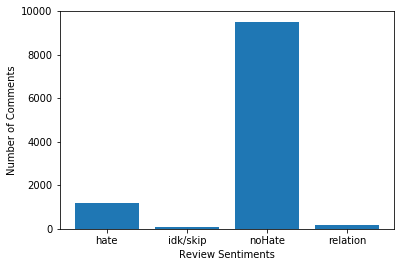

In [7]:
label_count=df.groupby('label').count()
plt.bar(label_count.index.values, label_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Comments')
plt.show()

In [34]:
mapping = {'noHate': 1, 'hate':2, 'relation':3,'idk/skip':4 }
df['new_label'] = df['label'].apply(lambda s: mapping.get(s))

In [35]:
df.head()

,file_id,user_id,subforum_id,num_contexts,label,text,new_label
0,12834217_1,572066,1346,0,noHate,"as of march 13th , 2014 , the booklet had been...",1
1,12834217_2,572066,1346,0,noHate,in order to help increase the booklets downloa...,1
2,12834217_3,572066,1346,0,noHate,( simply copy and paste the following text int...,1
3,12834217_4,572066,1346,0,hate,click below for a free download of a colorfull...,2
4,12834217_5,572066,1346,0,noHate,click on the `` download ( 7.42 mb ) '' green ...,1


In [36]:
df1 = df.loc[(df["label"]=='hate') | (df["label"]=='noHate')]

In [39]:
df1.label.value_counts()

noHate    9507
hate      1196
Name: label, dtype: int64

In [43]:
len(df1)

10703

In [44]:
## BOW
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df1['text'])

In [45]:
X = text_counts
y = df1.new_label
print("X = ",X.shape," , y = ",y.shape)

X =  (10703, 15576)  , y =  (10703,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [48]:
from sklearn.svm import SVC
from sklearn import metrics

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
pred = svclassifier.predict(X_test)
print("Linear SVM Accuracy:",metrics.accuracy_score(y_test, pred))

Linear SVM Accuracy: 0.8888369920597852


In [52]:
## Cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel='linear'), X, y, scoring='accuracy', cv=5)

array([0.88468721, 0.88790285, 0.88598131, 0.89345794, 0.8817757 ])